In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=False)
# please show all columns
pd.set_option("display.max_columns", 60)
import seaborn as sns
sns.set()

### yes,no variables

#### Price attributes

* appraised_value
* third_party
* new_const

#### Hardware attributes
* tracking
* ground_mounted
* battery
* uinverter
* dc_optimizer

__I want to ask what is the cost/watt difference between installations with and without the above charateristics.  Also, I'd like to know when the characteristics appear/grow/shrink.__

In [5]:
dftts = pd.read_csv('../local/data/LBNL_openpv_tts_data/ttsclean20180123.csv', 
                     index_col='row_id', 
                     parse_dates=['install_date'],
                     dtype={'zipcode' : np.object})

In [6]:
dftts.head()

,file_row,data_provider,sysid_dp,sysid_tts,install_date,size_kw,price,appraised_value,cust_type,new_const,tracking,ground_mounted,battery,zipcode,city,county,state,third-party,uinverter,dc_optimizer,cost_per_watt
row_id,,,,,,,,,,,,,,,,,,,,,
1,10108220,California Public Utilities Commission (Curren...,PGE-INT-11328 & CA_ERP_24698,CA-NEM-12257,1998-01-09,2.2824,24500.00,False,RES,False,False,False,False,94107.0,San Francisco,San Francisco,CA,False,False,False,10.734315
2,10107162,California Public Utilities Commission (Curren...,PGE-INT-11220 & CA_ERP_24687,CA-NEM-11180,1998-01-30,1.8504,20555.54,False,RES,False,False,False,False,95949.0,Nevada City,Nevada,CA,False,False,False,11.108701
4,10107618,California Public Utilities Commission (Curren...,PGE-INT-11268 & CA_ERP_24540,CA-NEM-11641,1998-02-04,2.3076,20000.00,False,RES,False,False,False,False,94518.0,Concord,Contra Costa,CA,False,False,False,8.667013
6,10107745,California Public Utilities Commission (Curren...,PGE-INT-11280 & CA_ERP_24429,CA-NEM-11770,1998-04-03,2.3316,30941.00,False,RES,False,False,False,False,94038.0,Moss Beach,San Mateo,CA,False,False,False,13.270286
7,10107787,California Public Utilities Commission (Curren...,PGE-INT-11284 & CA_ERP_24701,CA-NEM-11812,1998-04-30,0.9300,13629.00,False,RES,False,False,False,False,94563.0,Orinda,Contra Costa,CA,False,False,False,14.654839


In [7]:
# save the installation month instead of computing it every time
install_month = dftts.install_date.apply(lambda x: x.to_period('M'))

In [8]:
# df.date_column.dt.to_period('M')
# byYeMo = dftts.groupby(lambda x: dftts.loc[x, 'install_date'].to_period('M'))

In [9]:
byYeMoAppraised = dftts.groupby([dftts.appraised_value, install_month])
#byYeMoAppraised = dftts.groupby([dftts.appraised_value, lambda x: dftts.loc[x, 'install_date'].to_period('M')])

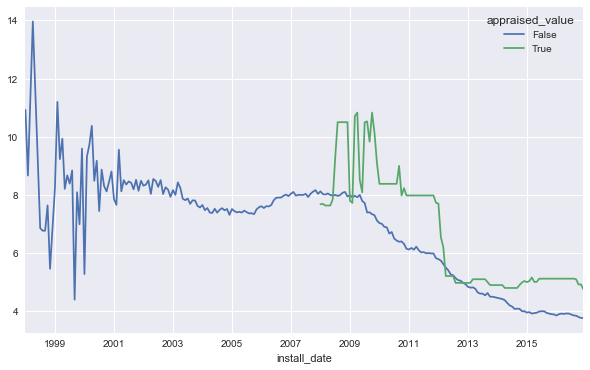

In [10]:
byYeMoAppraised.cost_per_watt.median().unstack('appraised_value').plot()

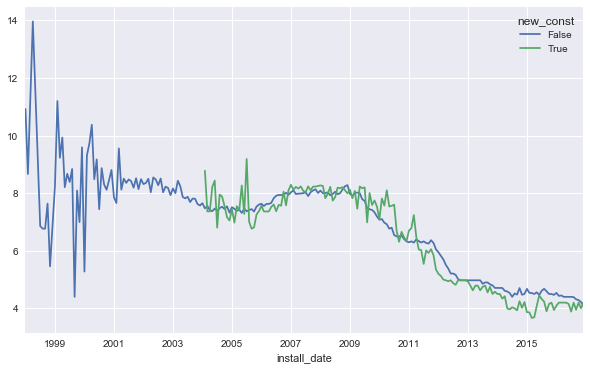

In [16]:
# new construction
byYeMoNewCon = dftts.groupby([dftts['new_const'], install_month])
byYeMoNewCon.cost_per_watt.median().unstack('new_const').plot()

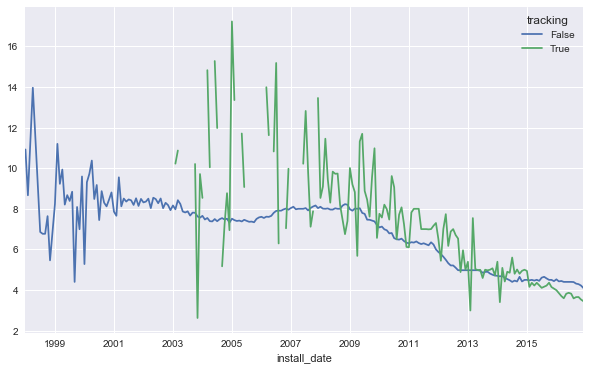

In [19]:
# tracking
byYeMoTrack = dftts.groupby([dftts['tracking'], install_month])
byYeMoTrack.cost_per_watt.median().unstack('tracking').plot()

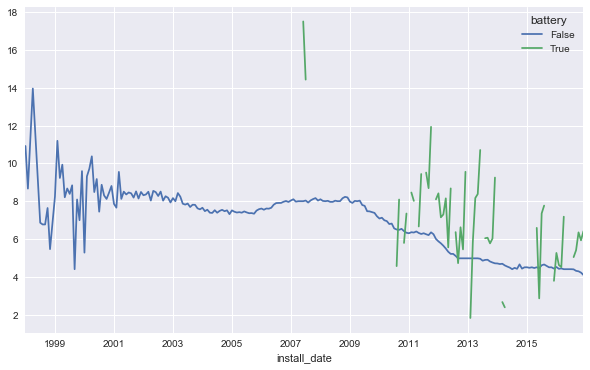

In [21]:
# battery
byYeMoBatt = dftts.groupby([dftts['battery'], install_month])
byYeMoBatt.cost_per_watt.median().unstack('battery').plot()

In [ ]:
byYeMoBatt = dftts.groupby([dftts['battery'], install_month])
byYeMoBatt.cost_per_watt.median().unstack('battery').plot()

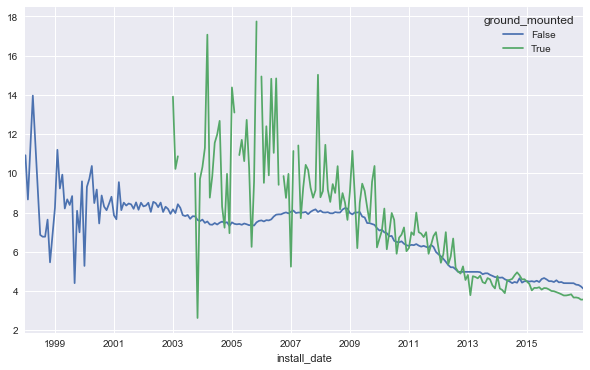

In [18]:
# ground_mounted
byYeMoGround = dftts.groupby([dftts['ground_mounted'], install_month])
byYeMoGround.cost_per_watt.median().unstack('ground_mounted').plot()

In [11]:
# third_party
# byYeMoTP = dftts.groupby([dftts['third-party'], lambda x: dftts.loc[x, 'install_date'].to_period('M')])
byYeMoN = dftts.groupby([dftts['third-party'], install_month])

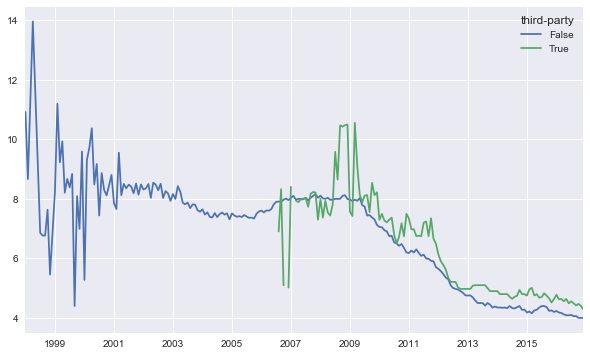

In [23]:
byYeMoTP.cost_per_watt.median().unstack('third-party').plot()

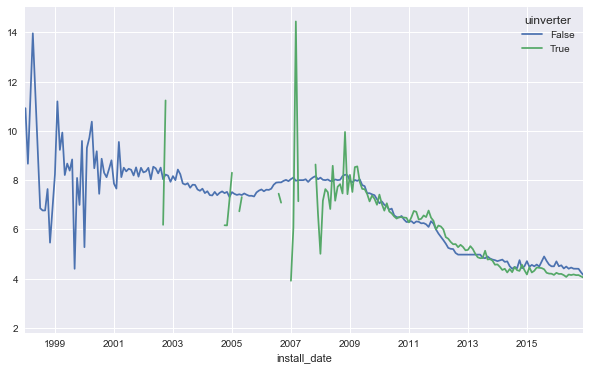

In [22]:
# micro-inverter
byYeMoUInv = dftts.groupby([dftts['uinverter'], install_month])
byYeMoUInv.cost_per_watt.median().unstack('uinverter').plot()

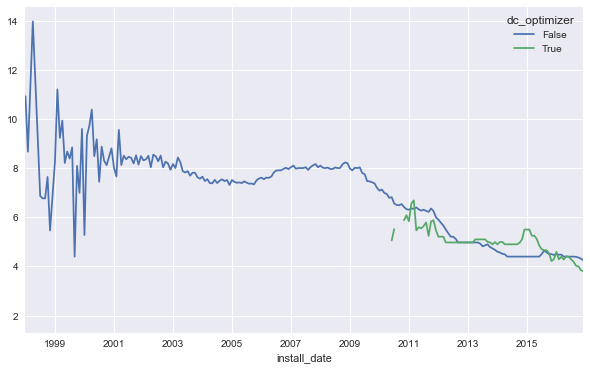

In [23]:
# dc_optimizer
byYeMoDCO = dftts.groupby([dftts['dc_optimizer'], install_month])
byYeMoDCO.cost_per_watt.median().unstack('dc_optimizer').plot()

In [27]:
print('still alive')

still alive
